Error cuadrático medio (MSE) en el conjunto de prueba: 0.5849022809023277


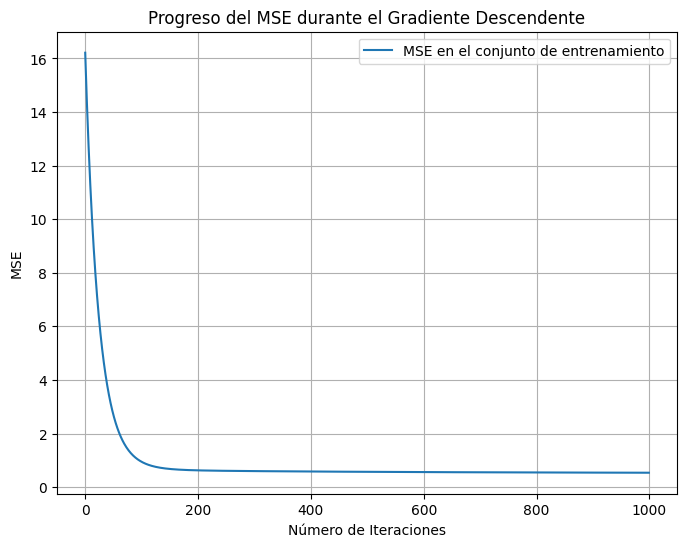

In [2]:
#ANDRES FELIPE GERENA CONTRERAS - ETITC - TS7A

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Cargar el dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Agregar un término de sesgo (intercepto) en X
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Parámetros del modelo
learning_rate = 0.01
n_iterations = 1000
m = X_train_b.shape[0]

# Inicializar los pesos
theta = np.random.randn(X_train_b.shape[1])

# Lista para guardar el error en cada iteración
mse_history = []

# Función de gradiente descendente
for iteration in range(n_iterations):
    gradients = 2/m * X_train_b.T.dot(X_train_b.dot(theta) - y_train)
    theta -= learning_rate * gradients
    
    # Calcular el MSE en el conjunto de entrenamiento
    y_train_pred = X_train_b.dot(theta)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_history.append(mse_train)

# Predicciones en el conjunto de prueba
y_pred = X_test_b.dot(theta)

# Calcular el error cuadrático medio (MSE) final en el conjunto de prueba
mse_test = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE) en el conjunto de prueba: {mse_test}")

# Graficar el progreso del MSE a lo largo de las iteraciones
plt.figure(figsize=(8, 6))
plt.plot(range(n_iterations), mse_history, label='MSE en el conjunto de entrenamiento')
plt.xlabel('Número de Iteraciones')
plt.ylabel('MSE')
plt.title('Progreso del MSE durante el Gradiente Descendente')
plt.legend()
plt.grid(True)
plt.show()


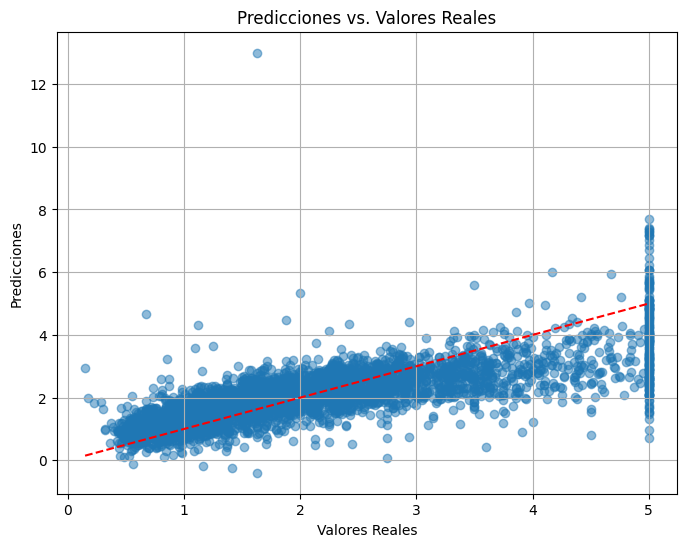

In [3]:
# Graficar Predicciones vs Valores Reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.grid(True)
plt.show()
